In [902]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

In [903]:
data = pd.read_csv("C:/Users/Ryan/Desktop/Data analytics/Russia-Ukraine/war_data.csv")
vix = pd.read_csv('C:/Users/Ryan/Desktop/Data analytics/Russia-Ukraine/VIX_History.csv')
stoxx = pd.read_csv('C:/Users/Ryan/Desktop/Data analytics/Russia-Ukraine/Euro Stoxx.csv')
dax = pd.read_csv('C:/Users/Ryan/Desktop/Data analytics/Russia-Ukraine/DAX Historical Data.csv')
ftse = pd.read_csv('C:/Users/Ryan/Desktop/Data analytics/Russia-Ukraine/FTSE 100 Historical Data.csv')

In [904]:
data.isna().sum()

date     0
close    0
open     0
high     0
low      0
dtype: int64

In [905]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
vix.dropna(inplace=True)
vix.drop_duplicates(inplace=True)


In [906]:
# merge the index prices and vix level into one data frame
df = pd.merge(data[['date', 'close']], vix[['date', 'close']], on='date', suffixes=('', '_vix'))

In [907]:
df = treat_data(df)

In [908]:
start_date = '2022-02-20'
end_date = '2022-03-01'
war_start = pd.to_datetime('2022-02-24')

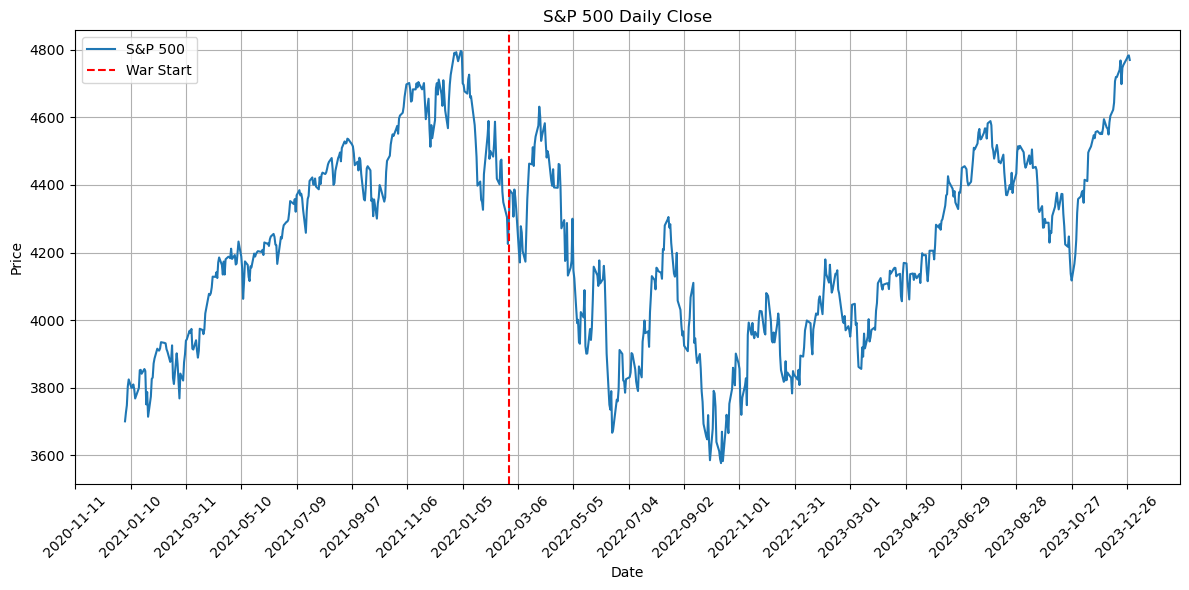

In [909]:
# S&P 500 close with war marker
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='S&P 500')
plt.axvline(war_start, color='red', linestyle='--', label='War Start')
plt.title('S&P 500 Daily Close')
plt.xlabel('Date')
plt.ylabel('Price')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

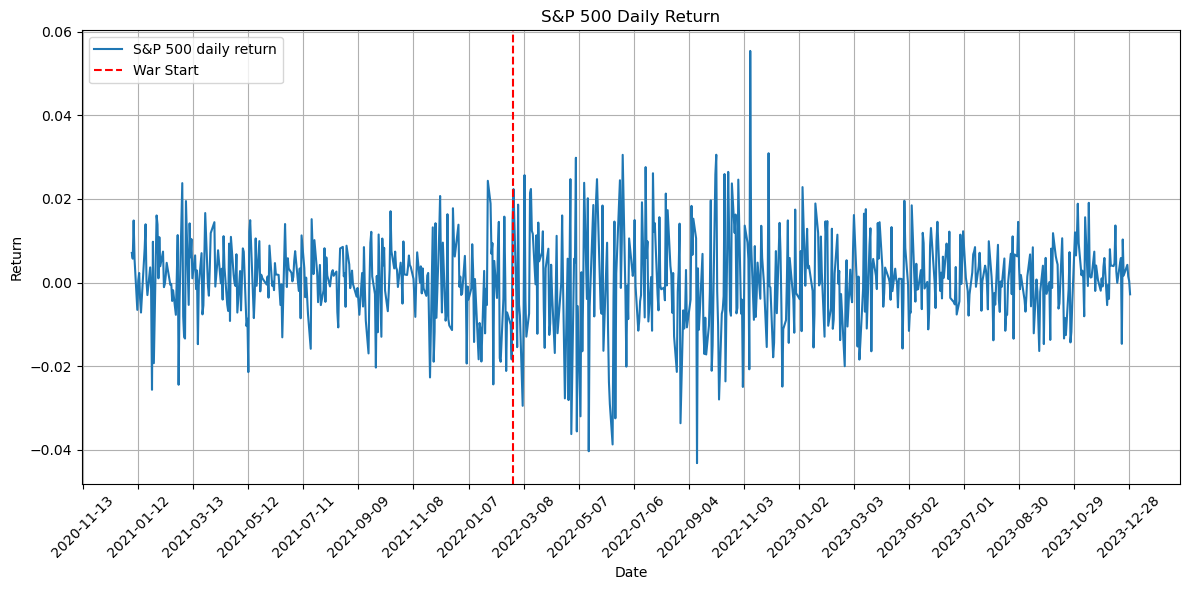

In [925]:
# S&P 500 daily returns
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['return'], label='S&P 500 daily return')
plt.axvline(war_start, color='red', linestyle='--', label='War Start')
plt.title('S&P 500 Daily Return')
plt.xlabel('Date')
plt.ylabel('Return')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.grid()
plt.show()

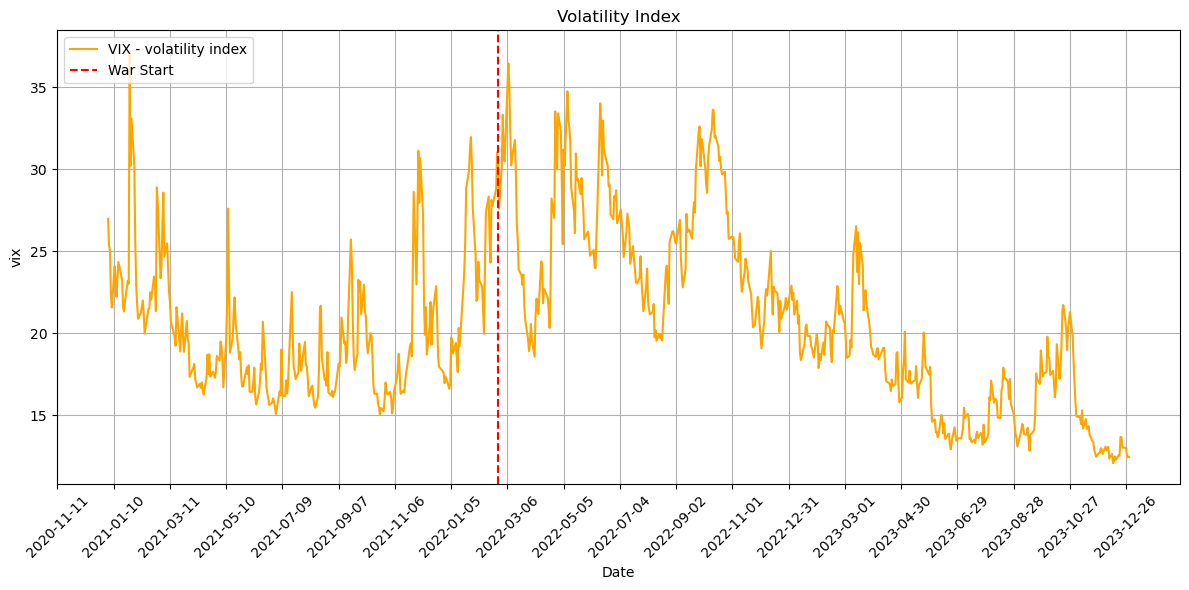

In [911]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close_vix'], label='VIX - volatility index', color='orange')
plt.axvline(war_start, color='red', linestyle='--', label='War Start')
plt.title('Volatility Index')
plt.xlabel('Date')
plt.ylabel('vix')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


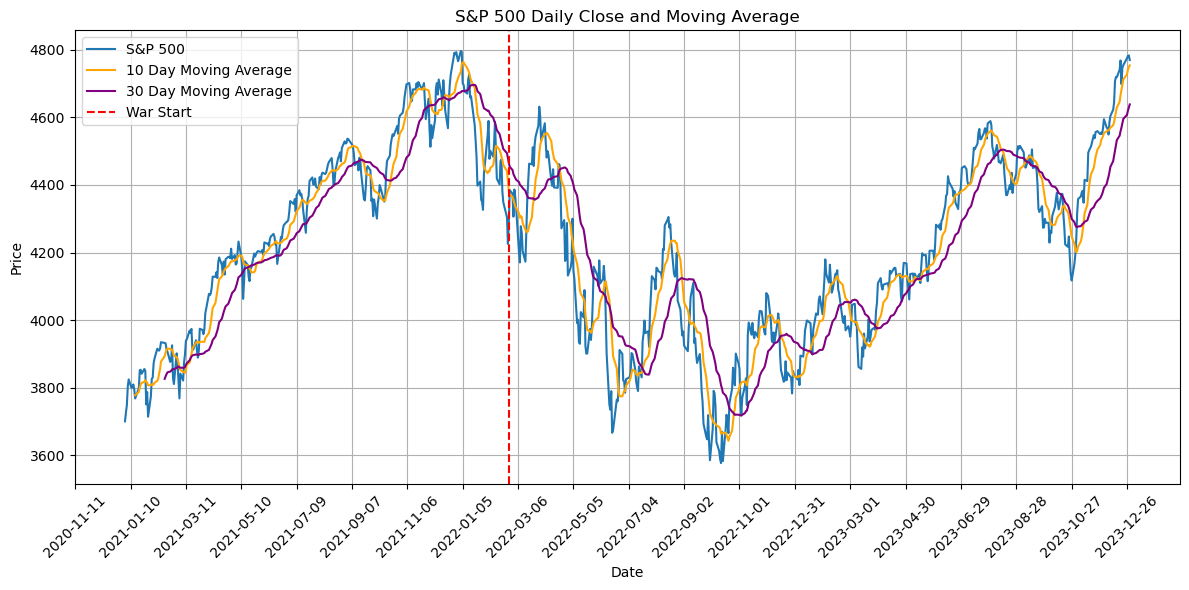

In [926]:
# S&P 500 close with war marker
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='S&P 500')
plt.plot(df['date'], df['sma-10'], label='10 Day Moving Average', color='orange')
plt.plot(df['date'], df['sma-30'], label='30 Day Moving Average', color='purple')
plt.axvline(war_start, color='red', linestyle='--', label='War Start')
plt.title('S&P 500 Daily Close and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [913]:
# function to calculate the average return and the volatility of an index
def analyze_war_impact(df):

    # ensure that close column is numeric
    #df['close'] = pd.to_numeric(df['close'], errors='coerce')

    df['return'] = df['close'].pct_change()
    
    pre = df[(df['date'] >= war_start - pd.Timedelta(days=30)) & (df['date'] < war_start)]
    post = df[(df['date'] > war_start) & (df['date'] <= war_start + pd.Timedelta(days=30))]

    result = {
        'pre_war_avg_return': round(pre['return'].mean()*100,3),
        'post_war_avg_return': round(post['return'].mean()*100,3),
        'pre_war_volatility': round(pre['return'].std()*100,3),
        'post_war_volatility': round(post['return'].std()*100,3)
    }

    return result

In [914]:
def treat_data(df):
    # convert the date column to date type
    df['date'] = pd.to_datetime(df['date'])

    # sort by date and set data column as index
    df.sort_values('date', inplace=True)

    # create return and volatility columns
    df['return'] = df['close'].pct_change()*100
    df['volatility'] = df['return'].rolling(10).std()

    # add a 10 day and 30 day moving average column
    df['sma-10'] = df['close'].rolling(window=10).mean()
    df['sma-30'] = df['close'].rolling(window=30).mean()

    # the date when the war started
    war_start = pd.to_datetime('2022-02-24')
    df['war'] = df['date'] >= war_start

    return df

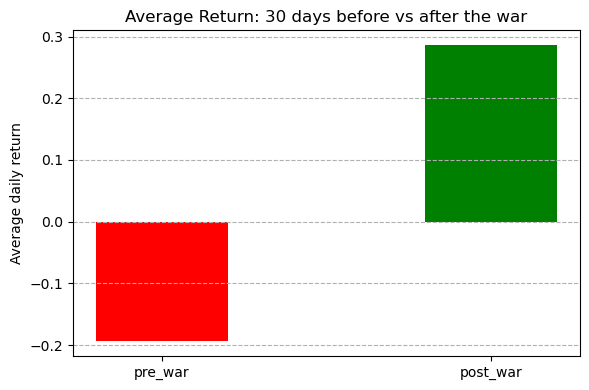

In [915]:
# calculate the average return and volatility of s&p 500 pre and post war
sp_metrics = analyze_war_impact(df)
pre_war_avg_return = sp_metrics['pre_war_avg_return']
post_avg_return = sp_metrics['post_war_avg_return']
pre_war_voltility = sp_metrics['pre_war_volatility']
post_war_volatility = sp_metrics['post_war_volatility']

plt.figure(figsize=(6,4))
plt.bar(["pre_war", "post_war"], [pre_war_avg_return, post_avg_return], color=['red', 'green'], width=0.4, bottom=0)
plt.title("Average Return: 30 days before vs after the war")
plt.ylabel('Average daily return')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

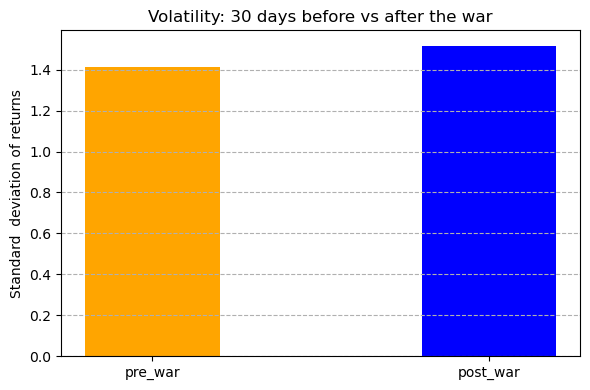

In [916]:
plt.figure(figsize=(6,4))
plt.bar(["pre_war", "post_war"], [pre_war_voltility, post_war_volatility], color=['orange', 'blue'], width=0.4, bottom=0)
plt.title("Volatility: 30 days before vs after the war")
plt.ylabel('Standard  deviation of returns')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

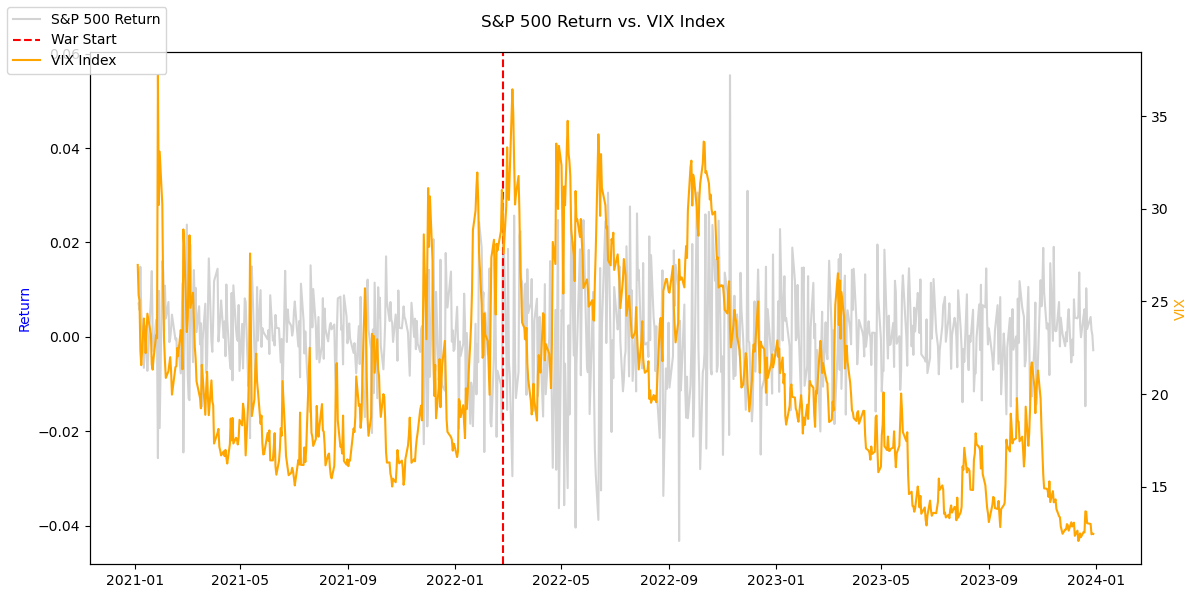

In [917]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['date'], df['return'], color='#D3D3D3', label='S&P 500 Return')
ax1.axvline(pd.to_datetime('2022-02-24'), color='red', linestyle='--', label='War Start')
ax1.set_ylabel('Return', color='blue')

ax2 = ax1.twinx()
ax2.plot(df['date'], df['close_vix'], color='orange', label='VIX Index')
ax2.set_ylabel('VIX', color='orange')

fig.suptitle('S&P 500 Return vs. VIX Index')
fig.legend(loc='upper left')
plt.tight_layout()
plt.show()


Treat and Analyze Europe markets data

In [918]:
df = treat_data(df)
dax = treat_data(dax)
ftse = treat_data(ftse)
stoxx = treat_data(stoxx)

df_metrics = analyze_war_impact(df)
dax_metrics = analyze_war_impact(dax)
ftse_metrics = analyze_war_impact(ftse)
stoxx_metrics = analyze_war_impact(stoxx)


In [919]:
summary = pd.DataFrame({
    'Index': ['S&P 500', 'DAX', 'FTSE 100', 'STOXX 600'],
    'Pre-war Avg Return': [df_metrics['pre_war_avg_return'], dax_metrics['pre_war_avg_return'], ftse_metrics['pre_war_avg_return'], stoxx_metrics['pre_war_avg_return']],
    'Post-war Avg Return': [df_metrics['post_war_avg_return'], dax_metrics['post_war_avg_return'], ftse_metrics['post_war_avg_return'], stoxx_metrics['post_war_avg_return']],
    'Pre-war Volatility': [df_metrics['pre_war_volatility'], dax_metrics['pre_war_volatility'], ftse_metrics['pre_war_volatility'], stoxx_metrics['pre_war_volatility']],
    'Post-war Volatility': [df_metrics['post_war_volatility'], dax_metrics['post_war_volatility'], ftse_metrics['post_war_volatility'], stoxx_metrics['post_war_volatility']]
})


In [920]:
display(summary)

,Index,Pre-war Avg Return,Post-war Avg Return,Pre-war Volatility,Post-war Volatility
0,S&P 500,-0.194,0.286,1.414,1.516
1,DAX,-0.109,0.121,1.254,2.762
2,FTSE 100,0.127,0.192,0.807,1.680
3,STOXX 600,-0.084,0.083,1.265,2.755


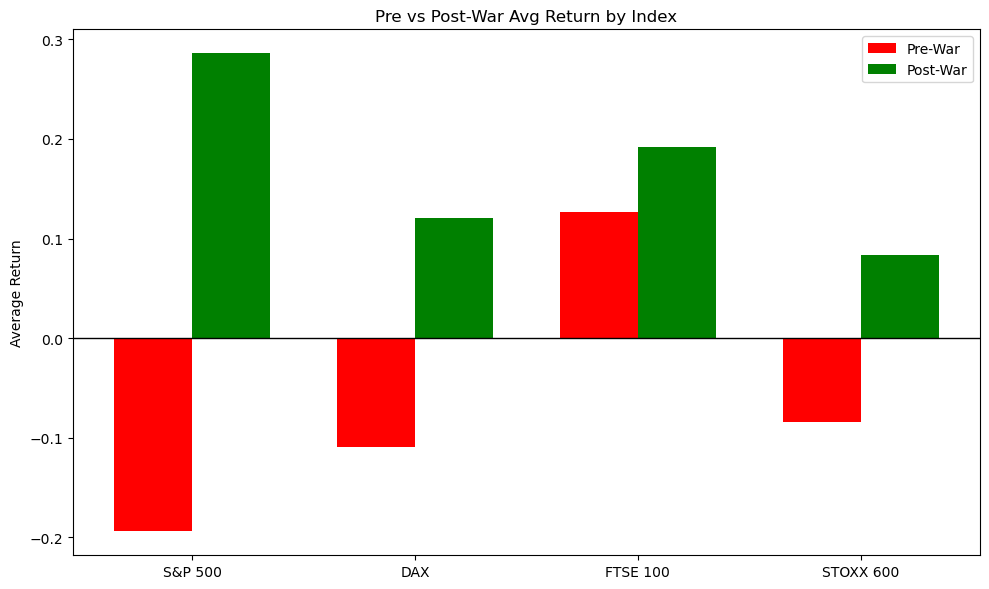

In [921]:
labels = summary['Index']
pre = summary['Pre-war Avg Return']
post = summary['Post-war Avg Return']

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, pre, width, label='Pre-War', color='red')
plt.bar([i + width for i in x], post, width, label='Post-War', color='green')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel('Average Return')
plt.title('Pre vs Post-War Avg Return by Index')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

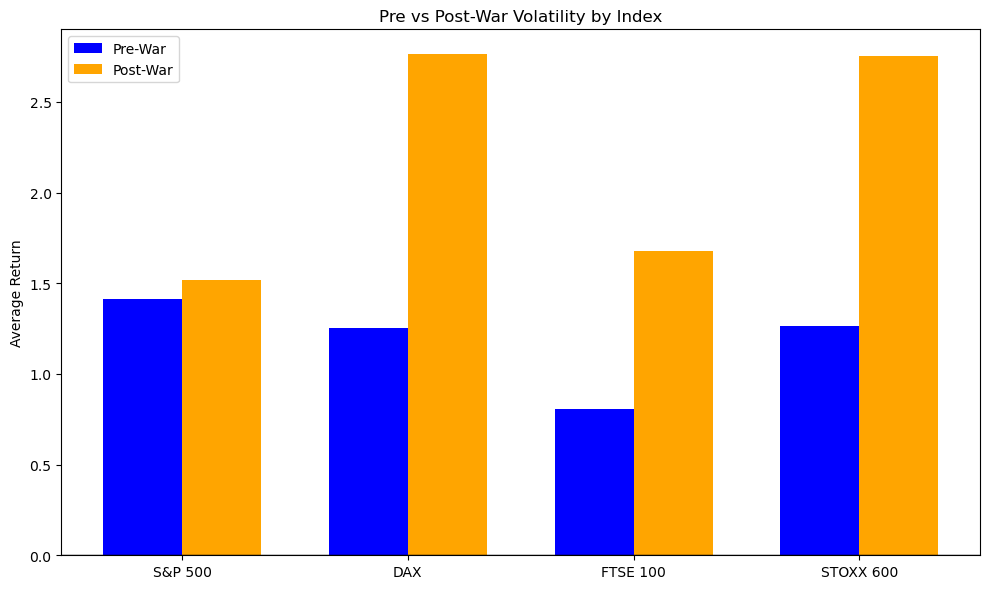

In [924]:
labels = summary['Index']
pre = summary['Pre-war Volatility']
post = summary['Post-war Volatility']

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, pre, width, label='Pre-War', color='blue')
plt.bar([i + width for i in x], post, width, label='Post-War', color='orange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel('Average Return')
plt.title('Pre vs Post-War Volatility by Index')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Conclusion

This project analyzed the impact of the Russia-Ukraine war on major global stock indices — the S&P 500 (U.S.), DAX (Germany), FTSE 100 (UK), and STOXX 600 (Europe) — focusing on returns and volatility 30 days before and after the war began (Feb 24, 2022). The goal was to understand how market psychology, fear, and geopolitical proximity influenced investor behavior.

### Key Findings:

- **S&P 500 showed resilience:** Despite a spike in volatility, the average return in the 30 days after the invasion was positive (+0.29%), suggesting a fast recovery driven by investor confidence.

- **Return volatility increased:** The standard deviation of daily returns for the S&P 500 rose from 1.41% pre-war to 1.52% post-war, confirming heightened market uncertainty.

- **VIX spike confirms fear reaction:** The VIX index jumped sharply at the time of invasion, reflecting a fear-driven psychological market response.

- **Daily returns became erratic post-war:** A visual surge in daily return swings occurred immediately after the invasion date, confirming short-term panic and uncertainty in the market.

- **Trend momentum shifted:** Moving averages (10- and 30-day) showed a clear trend reversal for the S&P 500 following the invasion, reinforcing the presence of negative market sentiment in the short term.

- **Cross-market return comparison:** All indices showed improved average returns post-invasion, with the S&P 500 and FTSE 100 leading the recovery. This indicates that global markets eventually absorbed the shock and stabilized, especially in the U.S. and UK.

- **Volatility surged more in Europe:** The DAX and STOXX 600 experienced significantly sharper spikes in volatility post-war compared to the S&P 500. For example, DAX volatility more than doubled (1.25% → 2.76%). This shows that geographical and economic proximity to the war increased sensitivity and fear in European markets.

- **Inverse return-VIX relationship:** Overlaying S&P 500 returns with the VIX index highlighted that returns dropped as fear (VIX) spiked — especially during the early war phase — validating the emotional nature of market reactions.

### Summary:

While all markets showed some level of stress, the magnitude and recovery varied. The U.S. market rebounded quickly, while European indices experienced deeper volatility. This analysis supports the idea that geopolitical events trigger strong psychological responses in financial markets, but their lasting effect depends on proximity, investor confidence, and regional economic ties.
